In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
dataFile = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/testData.csv")
dataFile.head()

,Sector Number,Frequency,Time Interval Avg,Time Interval Std Deriv,Total # of Blocks
0,753921,90736,0.45920,23941.33982,544416
1,240840,48735,0.88641,24708.56721,292465
2,836706,31787,1.29678,28796.58080,195293
3,837306,31704,1.29935,28766.62024,192217
4,700132,31288,1.15671,17203.72980,247313


In [20]:
data = dataFile[['Frequency', 'Time Interval Avg', 'Time Interval Std Deriv', ' Total # of Blocks']]
#scaler = MinMaxScaler()
#data_scale = scaler.fit_transform(data)#정규화
scaler = StandardScaler()#데이터 정규화
data_scale = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)

In [15]:
k = 4
model = KMeans(n_clusters=k, n_init=50)
model.fit(data_scale)
dataFile['cluster'] = model.fit_predict(data_scale)

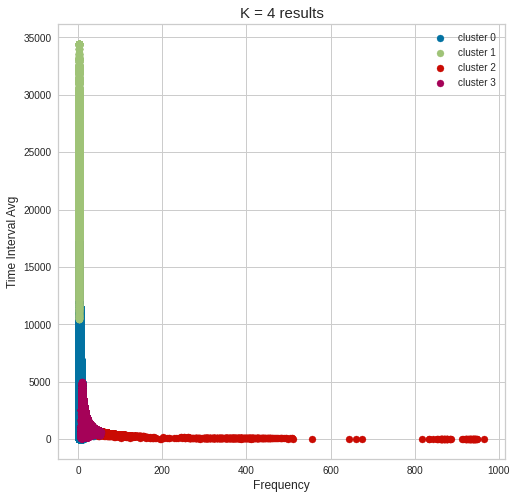

In [16]:
plt.figure(figsize = (8, 8))

for i in range(k):
    plt.scatter(dataFile.loc[dataFile['cluster'] == i, 'Frequency'], dataFile.loc[dataFile['cluster'] == i, 'Time Interval Avg'], 
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('Frequency', size = 12)
plt.ylabel('Time Interval Avg', size = 12)
plt.show()

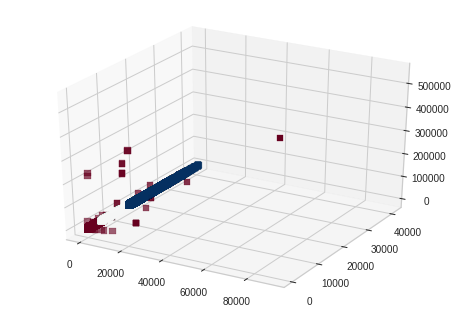

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = dataFile['Frequency']
y = dataFile['Time Interval Avg']
z = dataFile['Time Interval Std Deriv']

ax.scatter(x,y,z, marker="s", c=dataFile["cluster"], s=40, cmap="RdBu")

plt.show()

In [ ]:
dataFile.head()

,Sector Number,Frequency,Time Interval Avg,total # of blocks,cluster
0,753921,90736,0.459198,544416,0
1,240840,48735,0.886414,292465,0
2,836706,31787,1.296780,195293,0
3,837306,31704,1.299350,192217,0
4,700132,31288,1.156710,247313,0


In [6]:
from yellowbrick.cluster import KElbowVisualizer

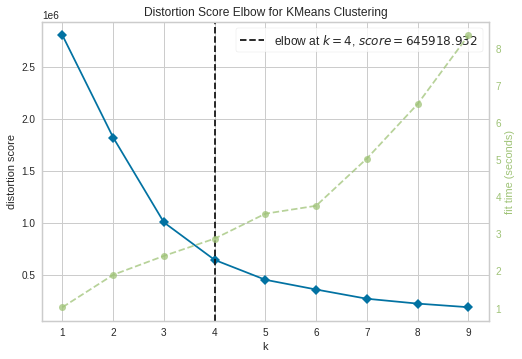

In [21]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 10))
visualizer.fit(data_scale)
visualizer.show()

In [ ]:
#dataFile.to_csv('clustered.csv')